# Week 6: Inferential Statistics

In [1]:
# Loading the libraries
import numpy as np
import sympy as sy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

np.random.seed(123)

## Day 2: Hypothesis Tests
Previously we used the CLT to construct a confidence interval (CI) to estimate the population mean $\mu$ based on a sample and its mean $\bar{x}$, standard deviation $s$ and size $n$. This approach gave us an opportunity to *get a feeling* in what range is $\mu$ *likely* to be found.

Now we take a different approach, somewhat opposite. We make an assumption about the value of the population mean $\mu$ or, in other words, we state a **hypothesis**. Next, we evaluate how likely is it to obtain a random sample with $\bar{x}$, $s$ and $n$ assuming our initial hypothesis is true. Logigally, if such a sample is unlikely, then our hypothesis should be rejected. Conversely, if such a sample is not unlikely, then we can say that there is no reason to reject our hypothesis.

This outlines the reasoning behind **hypothesis** or **significance tests** in statistics. We start by describing the details of what is known as the **Student's *t*-test for the value of the population mean**, and then extend to other tests without paying attention to the details.

### Student's *t*-test for the population means
We use this test if we want to check if our data fits out hypothesized value of the population mean $\mu$. We state the initial, **null-hypothesis** $H_0$. In this hypothesis we state the value, $\mu_0$, we *think* the mean $\mu$ takes:
\begin{equation} H_0: \mu = \mu_0 \end{equation}
Based on the problem we work with (or other assumptions, or requirements), we state the **alternative hypothesis**, $H_a$, as one of three possible versions:
\begin{equation}
\begin{array}{rcl}
H_a: \mu &\neq& \mu_0\\
H_a: \mu &>& \mu_0\\
H_a: \mu &<& \mu_0
\end{array}
\end{equation}
The top version is called **two-sided** or **two-tailed**, whereas the others are called **one-sided** or **one-tailed**. 

Based on the version of $H_a$, we calculate a probability called $p$-value which describes *the probability of observing as extreme or more extreme of a difference between the sample mean $\bar{x}$ and the hypothesized population mean $\mu_0$, under the assumption that $H_0$ is actually true*. Informally:
\begin{equation}
p = P\left( \text{sample} \mid H_0 \text{ is true} \right)
\end{equation}
Small $p$-values are evidence against $H_0$. Usually an arbitrary threshold $\alpha$ is set, such that if $p < \alpha$ we would reject $H_0$. The number $\alpha$ is called **significance level** and most frequently is se to $\alpha = 0.05 = 5\%$. This corresponds to a significance level of $0.95 = 95\%$.


### Example 1
We run into some research which suggests that the heights of female students in their senior year in a certain city has an average of 160 cm. We want to put this claim to the test, as we suspect that the mean height is greater than the one the research states. We collect some data by measuring the heights of 15 female students in their senior year. Run a *t*-test to check if the original research is verified by our data.

In [12]:
def fill_between(X, a, b):
    mu, sigma = X.mean(), X.std()
    
    xs = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
    ys = [X.pdf(x) for x in xs]
    
    plt.figure(figsize=(12, 2))
    plt.plot(xs, ys)
    
    x_fill = np.linspace(a, b, 1000)
    y_fill = [X.pdf(x) for x in x_fill]
    plt.fill_between(x_fill, y_fill, color='red', alpha=0.4)

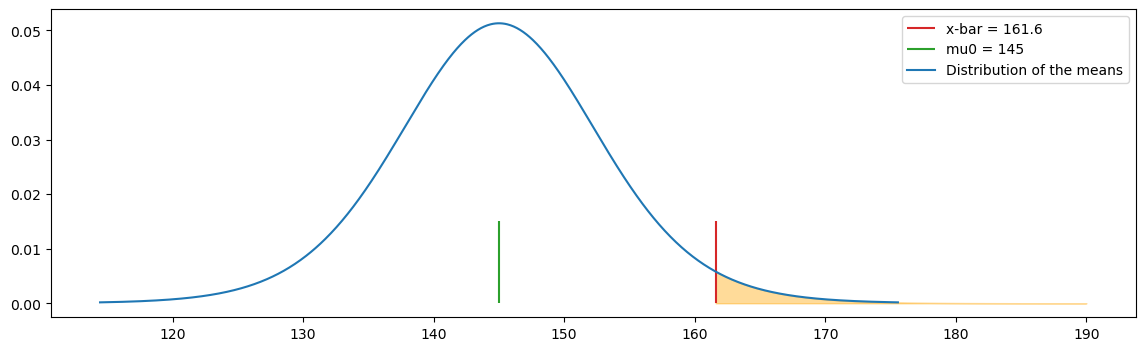

p-value =  0.023731810628856098


In [22]:
# the sample
sample = np.array([156, 170, 165, 153, 159, 174, 146, 160, 172, 157, 158, 162, 173, 159, 160])

# hypotheses
# H0: mu = mu0 <--- always has "="
# Ha: mu > mu0  <--- our suspicion
mu0 = 145

# Get the statistics

df = sample.size - 1

T = stats.t(df=df, loc=mu0, scale=sample.std())

# Assuming H0 is true, this is the distribution of the averages of the heights for samples of size n
x_bar = sample.mean()


# Let us plot all the facts together
xs = np.linspace(mu0 - 4 * sample.std(), mu0 + 4 * sample.std() ,1000)
ys = np.array([T.pdf(x) for x in xs])
plt.figure(figsize=(14, 4))
plt.vlines(x_bar, 0, 0.015, color='tab:red', label=f'x-bar = {np.round(x_bar,2)}')

plt.vlines(mu0, 0, 0.015, color='tab:green', label=f'mu0 = {np.round(mu0,2)}')

plt.plot(xs, ys, label='Distribution of the means')

a, b = x_bar, 190

x_fill = np.linspace(a, b, 1000)
y_fill = [T.pdf(x) for x in x_fill]
plt.fill_between(x_fill, y_fill, color='orange', alpha=0.4)

plt.legend()
plt.show()


# # Calculate the p-value: (x_bar, +infty)
p = 1 - T.cdf(x_bar)
print('p-value = ', p)

# # Print a simple conclusion:
# if p < 0.05:
#     print('Reject H0 in favor of Ha')
# else:
#     print('Do not reject H0')

--- 

# Continue (Workshop) from here

In [9]:
def fill_between_func(X, a, b):
    x_fill = np.linspace(a, b, 1000)
    y_fill = [X.pdf(x) for x in x_fill]
    plt.fill_between(x_fill, y_fill, color='orange', alpha=0.4)

## Example 2
Bjork Larsen was trying to decide whether to use a new racing wax for cross-country skis. He decided that the wax would be worth the price if he could average less than 55 seconds on a course he knew well, so he planned to test the wax by racing on the course 8 times. His 8 times are given in the cell below. Should he buy the wax?

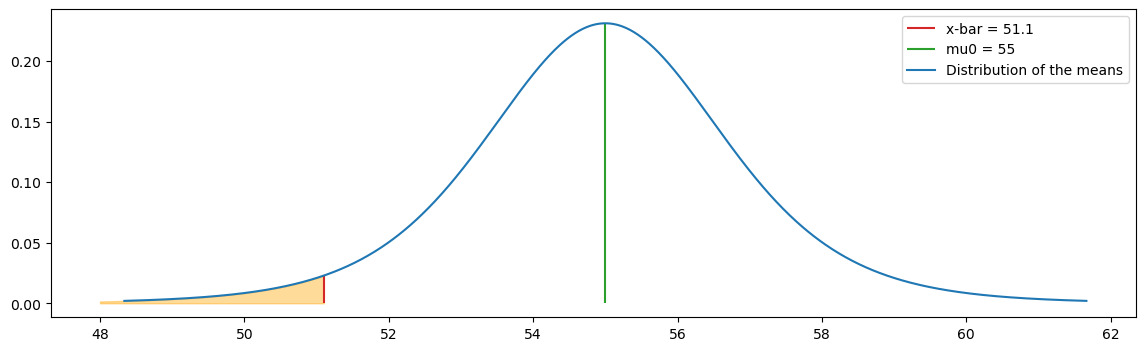

p-value = 0.025877842768481464
Reject H0 in favor of Ha


In [12]:
''' 1) Ha : mu < mu0 '''

# the sample
sample = np.array([50.3, 55.9, 50.5, 52.4, 46.5, 57.8, 52.2, 43.2])

# hypotheses
# H0: mu = 55
# Ha: mu < 55
mu0 = 55
se = stats.sem(sample)

x_bar = sample.mean()

# Approximate the sampling distribution using the t-distribution:
T = stats.t(df=sample.size - 1, loc=55, scale=stats.sem(sample))

# Find the p-value:
p_value = T.cdf(x_bar)

# Visualization:
xs = np.linspace(mu0 - 4 * se, mu0 + 4 * se, 1000)
ys = np.array([T.pdf(x) for x in xs])

plt.figure(figsize=(14, 4))

plt.vlines(x_bar, 0, T.pdf(x_bar), color='tab:red', label=f'x-bar = {np.round(x_bar,2)}')
plt.vlines(mu0, 0, T.pdf(mu0), color='tab:green', label=f'mu0 = {np.round(mu0,2)}')

plt.plot(xs, ys, label='Distribution of the means')

a, b = 48, x_bar

fill_between_func(T, a, b)

# x_fill = np.linspace(a, b, 1000)
# y_fill = [T.pdf(x) for x in x_fill]
# plt.fill_between(x_fill, y_fill, color='orange', alpha=0.4)

plt.legend()
plt.show()

print(f"p-value = {p_value}")

if p_value < 0.05:
    print('Reject H0 in favor of Ha')
else:
    print('Do not reject H0')

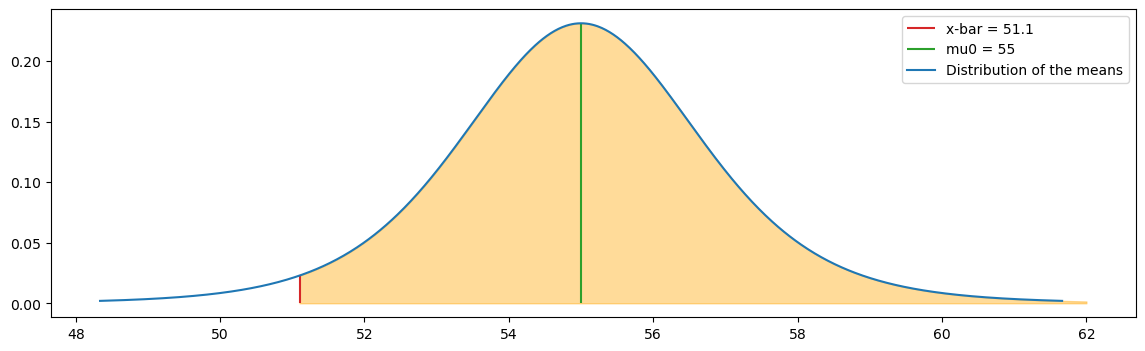

p-value = 0.9741221572315185
Do not reject H0


In [15]:
''' 2) Ha : mu > mu0 '''

# the sample
sample = np.array([50.3, 55.9, 50.5, 52.4, 46.5, 57.8, 52.2, 43.2])

# hypotheses
# H0: mu = 55
# Ha: mu > 55
mu0 = 55
se = stats.sem(sample)

x_bar = sample.mean()

# Approximate the sampling distribution using the t-distribution:
T = stats.t(df=sample.size - 1, loc=55, scale=stats.sem(sample))

# Find the p-value:
p_value = 1 - T.cdf(x_bar)

# Visualization:
xs = np.linspace(mu0 - 4 * se, mu0 + 4 * se, 1000)
ys = np.array([T.pdf(x) for x in xs])

plt.figure(figsize=(14, 4))

plt.vlines(x_bar, 0, T.pdf(x_bar), color='tab:red', label=f'x-bar = {np.round(x_bar,2)}')
plt.vlines(mu0, 0, T.pdf(mu0), color='tab:green', label=f'mu0 = {np.round(mu0,2)}')

plt.plot(xs, ys, label='Distribution of the means')

a, b = x_bar, 62

fill_between_func(T, a, b)

# x_fill = np.linspace(a, b, 1000)
# y_fill = [T.pdf(x) for x in x_fill]
# plt.fill_between(x_fill, y_fill, color='orange', alpha=0.4)

plt.legend()
plt.show()

print(f"p-value = {p_value}")

if p_value < 0.05:
    print('Reject H0 in favor of Ha')
else:
    print('Do not reject H0')

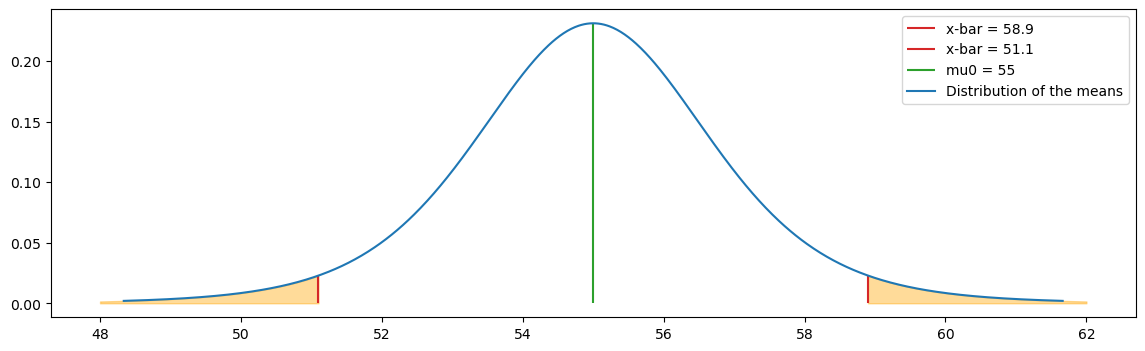

p-value = 0.05175568553696293
Do not reject H0


In [25]:
''' 3) Ha : mu =/= mu0 '''

# the sample
sample = np.array([50.3, 55.9, 50.5, 52.4, 46.5, 57.8, 52.2, 43.2])

# hypotheses
# H0: mu = 55
# Ha: mu =/= 55
mu0 = 55
se = stats.sem(sample)

x_bar = sample.mean()

# Approximate the sampling distribution using the t-distribution:
T = stats.t(df=sample.size - 1, loc=55, scale=stats.sem(sample))

# Find the p-value:
p_value = 2 * T.cdf(x_bar)

# Visualization:
xs = np.linspace(mu0 - 4 * se, mu0 + 4 * se, 1000)
ys = np.array([T.pdf(x) for x in xs])

plt.figure(figsize=(14, 4))

plt.vlines(mu0 + (mu0 - x_bar), 0, T.pdf(x_bar), color='tab:red', label=f'x-bar = {np.round(mu0 + (mu0 - x_bar),2)}')
plt.vlines(x_bar, 0, T.pdf(x_bar), color='tab:red', label=f'x-bar = {np.round(x_bar,2)}')
plt.vlines(mu0, 0, T.pdf(mu0), color='tab:green', label=f'mu0 = {np.round(mu0,2)}')

plt.plot(xs, ys, label='Distribution of the means')

a, b = 48, x_bar
fill_between_func(T, a, b)

a, b = mu0 + (mu0 - x_bar), 62
fill_between_func(T, a, b)

plt.legend()
plt.show()

print(f"p-value = {p_value}")

if p_value < 0.05:
    print('Reject H0 in favor of Ha')
else:
    print('Do not reject H0')

---

The conditions required to conduct the t-test include the measured values in ratio scale or interval scale, simple random extraction, normal distribution of data, appropriate sample size, and homogeneity of variance.

In [ ]:
''' Test for normality of the data (Shapiro-Wilk test / Kolmogorov test): '''
...


In [ ]:
''' Test for homogeneity of variance: '''
...


In [34]:
''' In practice: '''
sample = np.array([50.3, 55.9, 50.5, 52.4, 46.5, 57.8, 52.2, 43.2])

# H0 : mu = mu0, Ha : mu < mu0
print(f"t-test : {stats.ttest_1samp(sample, mu0, alternative='less')}\n")

if p_value < 0.05:
    print('Reject H0 in favor of Ha')
else:
    print('Do not reject H0')

t-test : TtestResult(statistic=-2.3411708782318943, pvalue=0.025877842768481464, df=7)

Do not reject H0


In [33]:
''' In practice: '''
sample = np.array([50.3, 55.9, 50.5, 52.4, 46.5, 57.8, 52.2, 43.2])

# H0 : mu = mu0, Ha : mu > mu0
print(f"t-test : {stats.ttest_1samp(sample, mu0, alternative='greater')}\n")

if p_value < 0.05:
    print('Reject H0 in favor of Ha')
else:
    print('Do not reject H0')

t-test : TtestResult(statistic=-2.3411708782318943, pvalue=0.9741221572315185, df=7)

Do not reject H0


In [32]:
''' In practice: '''
sample = np.array([50.3, 55.9, 50.5, 52.4, 46.5, 57.8, 52.2, 43.2])

# H0 : mu = mu0, Ha : mu =/= mu0
print(f"t-test : {stats.ttest_1samp(sample, mu0, alternative='two-sided')}\n")

if p_value < 0.05:
    print('Reject H0 in favor of Ha')
else:
    print('Do not reject H0')

t-test : TtestResult(statistic=-2.3411708782318943, pvalue=0.05175568553696293, df=7)

Do not reject H0


### Example 3
The mean annual salary for a school administrator in the USA is \$90,000 a year (*The Cincinnati Enquirer*, April 7, 2012). A school official took a sample school administrators in the state of Ohio to learn about salaries in that state to see if they differed from the national average. The data is given inc the cell below. Do the salaries in Ohio **differ** from the national average?

In [39]:
# the sample
sample = np.array([77600, 76000, 90700, 97200, 90700, 101800, 78700, 81300, 84200, 97600, 77500,
                   75700, 89400, 84300, 78700, 84600, 87700, 103400, 83800, 101300, 94700, 69200,
                   95400, 61500, 68800])

n = sample.size

x_bar = sample.mean()

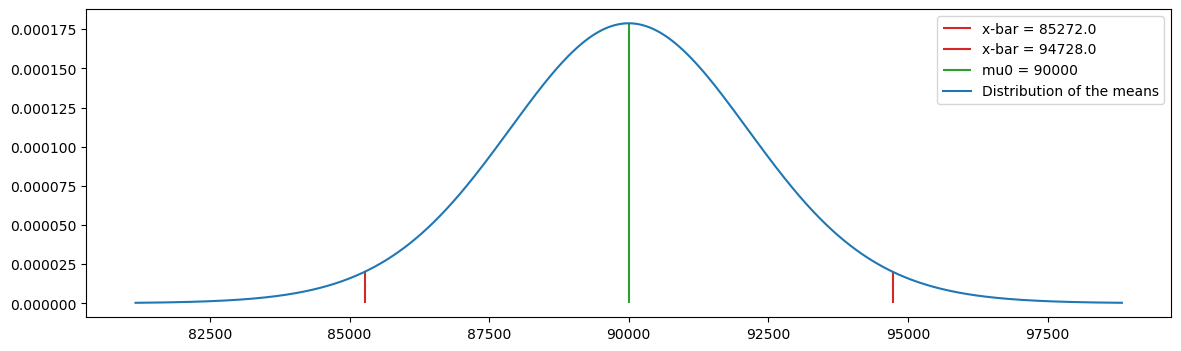

In [55]:
mu0 = 90000
se = stats.sem(sample)

T = stats.t(df= n - 1, loc=mu0, scale=stats.sem(sample))

# Visualization:
xs = np.linspace(mu0 - 4 * se, mu0 + 4 * se, 1000)
ys = np.array([T.pdf(x) for x in xs])

plt.figure(figsize=(14, 4))

plt.vlines(x_bar, 0, T.pdf(x_bar), color='tab:red', label=f'x-bar = {np.round(x_bar,2)}')
plt.vlines(mu0 + (mu0 - x_bar), 0, T.pdf(x_bar), color='tab:red', label=f'x-bar = {np.round(mu0 + (mu0 - x_bar),2)}')
plt.vlines(mu0, 0, T.pdf(mu0), color='tab:green', label=f'mu0 = {np.round(mu0,2)}')

plt.plot(xs, ys, label='Distribution of the means')

# a, b = 82500, x_bar
# fill_between_func(T, a, b)

# a, b = mu0 + (mu0 - x_bar), 97500
# fill_between_func(T, a, b)

plt.legend()
plt.show()

In [64]:
(sample.mean() - 90000) / (sample.std() / np.sqrt(sample.size))

-2.1856120278967373

2163.238461196546

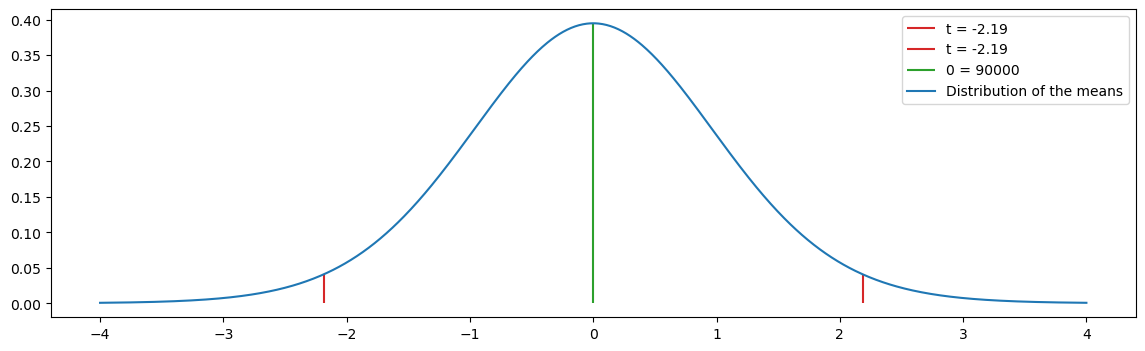

In [63]:
mu0 = 90000
se = stats.sem(sample)

# the sample
sample = np.array([77600, 76000, 90700, 97200, 90700, 101800, 78700, 81300, 84200, 97600, 77500,
                   75700, 89400, 84300, 78700, 84600, 87700, 103400, 83800, 101300, 94700, 69200,
                   95400, 61500, 68800])

n = sample.size

x_bar = sample.mean()

T = stats.t(df= n - 1, loc=0, scale=1)

t = (sample.mean() - mu0) / (sample.std() / np.sqrt(sample.size))

# Visualization:
xs = np.linspace(0 - 4 * 1, 0 + 4 * 1, 1000)
ys = np.array([T.pdf(x) for x in xs])

plt.figure(figsize=(14, 4))

plt.vlines(t, 0, T.pdf(t), color='tab:red', label=f't = {np.round(t,2)}')
plt.vlines(-t, 0, T.pdf(t), color='tab:red', label=f't = {np.round(t,2)}')
plt.vlines(0, 0, T.pdf(0), color='tab:green', label=f'0 = {np.round(mu0,2)}')

plt.plot(xs, ys, label='Distribution of the means')

# a, b = 82500, x_bar
# fill_between_func(T, a, b)

# a, b = mu0 + (mu0 - x_bar), 97500
# fill_between_func(T, a, b)

plt.legend()
plt.show()

In [48]:
# H0 : mu = 90000
# Ha : mu =/= 90000

print(f"t-test : {stats.ttest_1samp(sample, popmean=90000, alternative='two-sided')}\n")

if p_value < 0.05:
    print('Reject H0 in favor of Ha')
else:
    print('Do not reject H0')

t-test : TtestResult(statistic=-2.1414536976146397, pvalue=0.04259652327361103, df=24)

Do not reject H0


### Example 4*: what to do if we have only statistics?
In cases like these, resort to **standardization** using the following formula
\begin{equation} t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}} \end{equation}
and then proceed with a "standard" *t*-distribution (with the default values: `loc=0, scale=1` and `df=n-1`) and use the $t$ from the formula as the start/end of the accumulation of the $p$-value. Let's see an example.

In a cardiological study, a sample of $n = 100$ people had an average systolic blood pressure of $\bar{x}=125.1$ mm Hg with a standard deviation of $s = 21.21$ mm Hg. Is the group average BP significantly greater than the regular population? It is assumed that the “normal” systolic blood pressure is $\mu_0 = 120$ mm Hg.

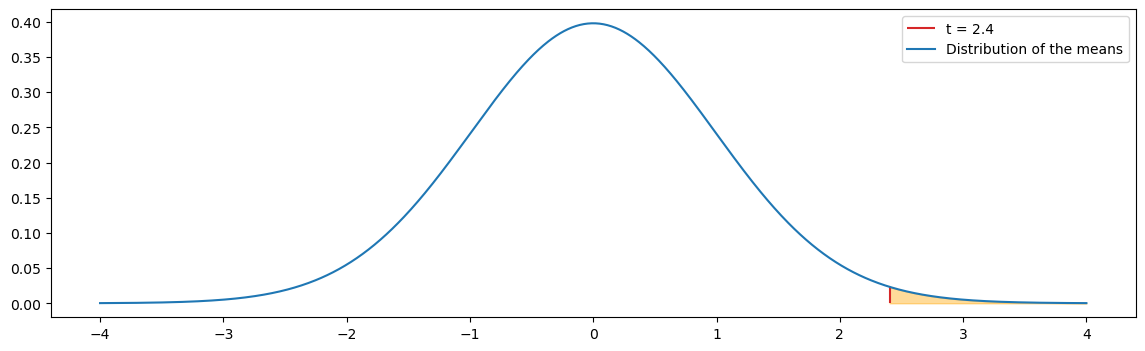

p-value = 0.00902629017734835

Reject H0 in favor of Ha


In [68]:
# statistics
n = 100
x_bar = 125.1
s = 21.21
mu0 = 120

# H0 : mu = 120
# Ha : mu > 120

T = stats.t(df = n - 1, loc=0, scale=1)

t = (x_bar - mu0) / (s / np.sqrt(n))

p_value = 1 - T.cdf(t)

# Visualization:
xs = np.linspace(0 - 4 * 1, 0 + 4 * 1, 1000)
ys = np.array([T.pdf(x) for x in xs])

plt.figure(figsize=(14, 4))

plt.vlines(t, 0, T.pdf(t), color='tab:red', label=f't = {np.round(t,2)}')
# plt.vlines(mu0 + (mu0 - x_bar), 0, T.pdf(x_bar), color='tab:red', label=f'x-bar = {np.round(mu0 + (mu0 - x_bar),2)}')
# plt.vlines(mu0, 0, T.pdf(mu0), color='tab:green', label=f'mu0 = {np.round(mu0,2)}')

plt.plot(xs, ys, label='Distribution of the means')

a, b = t, 4
fill_between_func(T, a, b)

plt.legend()
plt.show()

print(f"p-value = {p_value}\n")

if p_value < 0.05:
    print('Reject H0 in favor of Ha')
else:
    print('Do not reject H0')

### Comparing two means: the two sample *t*-test
Most frequently we have to compare two samples in terms of their means: do the two samples come from populations with equal means? In other words: do the two samples come from the same population, or from different populations?

The *t*-test can be adapted to work in this context. Assume we have two samples which come from two populations, with means $\mu_1$ and $\mu_2$ respectively. The hypotheses of the test are:
\begin{equation}
H_0: \mu_1 = \mu_2
\end{equation}
and
\begin{equation}
\begin{array}{rcl}
H_a: \mu_1 &\neq& \mu_2\\
H_a: \mu_1 &<& \mu_2\\
H_a: \mu_1 &>& \mu_2
\end{array}
\end{equation}

Without getting into the details of how the test manages to produce a $p$-value, we use the `scipy`'s capabilities and directly step into problem-solving.

### Example 5: 
Home values tend to increase over time under normal conditions, but the recession of 2008 and 2009 has reportedly caused the sales price of existing homes to fall accross the US. Do data support this conclusion? The cell below contains data on 30 existing home sales in 2006 and 40 existing home sales in 2009. Is there any evidence that the prices have fallen in 2009 compared to 2006?

In [73]:
# the samples
s_2006 = np.array([213100, 226200, 239100, 214300, 161700, 181200, 228600, 222100, 228900, 235800, 
                   219400, 238800, 301800, 264200, 320200, 315000, 118900, 172400, 137500, 212800, 
                   175400, 311400, 296900, 292500, 287700, 246500, 195600, 155300, 152400, 211200])

s_2009 = np.array([155400, 189800, 200800, 280400, 213200, 181100, 117400, 130000, 170000, 149600,
                   146200, 54400, 213800, 186000, 182100, 180000, 215700, 164200, 95300, 239500,
                   207200, 188200, 169400, 185600, 177000, 178000, 161200, 249200, 146400, 99800,
                   246700, 173500, 138100, 112200, 137500, 147900, 179000, 116200, 197500, 164200])


# hypotheses
# H0: mu_2006 = mu_2009   <--- always has "="
# Ha: mu_2006 > mu_2009   <--- test if prices dropped in 2009

_, p_value = stats.ttest_ind(s_2006, s_2009, alternative='greater')

print(f"two sample t-test : {stats.ttest_ind(s_2006, s_2009, alternative='greater')}\n")

if p_value < 0.05:
    print('Reject H0 in favor of Ha')
else:
    print('Do not reject H0')

two sample t-test : Ttest_indResult(statistic=4.58418449738119, pvalue=1.0044241644705616e-05)

Reject H0 in favor of Ha


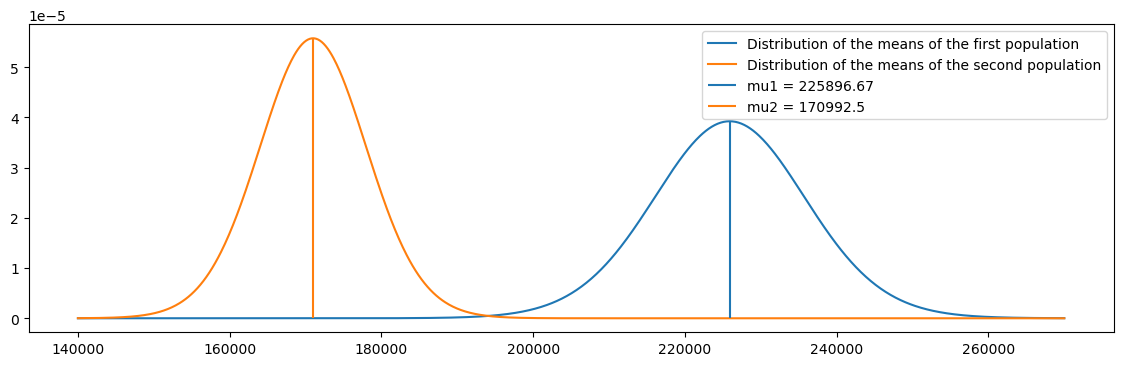

In [82]:
T1 = stats.t(df=s_2006.size - 1, loc=s_2006.mean(), scale=stats.sem(s_2006))
T2 = stats.t(df=s_2009.size - 1, loc=s_2009.mean(), scale=stats.sem(s_2009))

xs = np.linspace(140000, 270000, 1000)

ys1 = [T1.pdf(x) for x in xs]

ys2 = [T2.pdf(x) for x in xs]

plt.figure(figsize=(14, 4))

plt.plot(xs, ys1, label='Distribution of the means of the first population')
plt.plot(xs, ys2, label='Distribution of the means of the second population')

plt.vlines(T1.mean(), 0, T1.pdf(T1.mean()), color='tab:blue', label=f'mu1 = {np.round(T1.mean(),2)}')

plt.vlines(T2.mean(), 0, T2.pdf(T2.mean()), color='tab:orange', label=f'mu2 = {np.round(T2.mean(),2)}')

plt.legend()
plt.show()

In [75]:
s_2006.mean(), s_2009.mean()

(225896.66666666666, 170992.5)

In [71]:
help(stats.ttest_ind)

Help on function ttest_ind in module scipy.stats._stats_py:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which

### Comparing more than two means: the One-Way ANOVA *F*-test
The One-Way ANOVA *F*-test extends the two-sample *t*-test from two to an arbitrary number of samples. If you need to test if the means of more than two samples are equal, then you should use this test.

The hypotheses are:
\begin{equation}
\begin{array}{rcl}
H_0&:& \text{all means are equal}\\
H_a&:& \text{not all means are equal}
\end{array}
\end{equation}

There are three things that you must have in mind about the One-Way ANOVA *F*-test:
* The alternative hypotheses tests for generall difference between the means, similar to the $"\neq"$ alternatives of the *t*-test
* The test assumes that the variances of the population in question are all equal
* If you end up rejecting $H_0$, then the test does not tell you which means *are* different to answer this question, you will have to run **post-hoc** tests to identify the source(s) of the difference

### Example 6
The Consumer Reports Restaurant Customer Satisfaction Survey is based upon 148,599 visits to full-service restaurant chains. One of the variables in the study is meal price, the average amount paid per person for dinner and drinks, minus the tip. Suppose a reporter for the Sun Coast Times thought that it would be of interest to her readers to conduct a similar study for restaurants located on the Grand Strand section in Myrtle Beach, South Carolina. The reporter selected a random sample of 8 seafood restaurants, 8 Italian restaurants, and 8 steakhouses. The data in the cell below show the meal prices (in dollars) obtained for the 24 restaurants sampled. Is a significant difference among the mean meal price for the three types of restaurants?

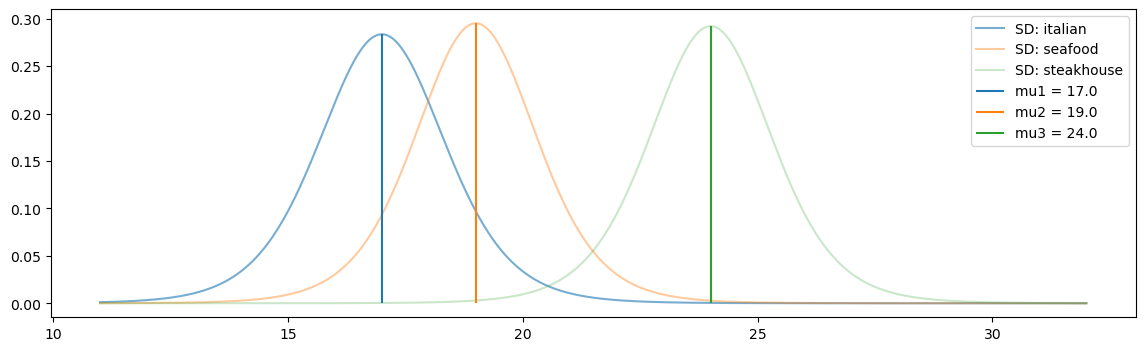

In [96]:
# samples
italian = np.array([12, 13, 15, 17, 18, 20, 17, 24])
seafood = np.array([16, 18, 17, 26, 23, 15, 19, 18])
steakhouse = np.array([24, 19, 23, 25, 21, 22, 27, 31])


# Hypotheses
# H0: mu1 = mu2 = mu3 (all means are equal)
# Ha: mu1 =/= mu2 =/= mu3 (not all means are equal, some maybe are)

# Distributions:
T_italian = stats.t(df=italian.size, loc=italian.mean(), scale=stats.sem(italian))
T_seafood = stats.t(df=seafood.size, loc=seafood.mean(), scale=stats.sem(seafood))
T_steakhouse = stats.t(df=steakhouse.size, loc=steakhouse.mean(), scale=stats.sem(steakhouse))

# Visualization:
plt.figure(figsize=(14, 4))

xs = np.linspace(11, 32, 1000)

ys_italian = [T_italian.pdf(x) for x in xs]
ys_seafood = [T_seafood.pdf(x) for x in xs]
ys_steakhouse = [T_steakhouse.pdf(x) for x in xs]

plt.plot(xs, ys_italian, label='SD: italian', alpha=0.6)
plt.plot(xs, ys_seafood, label='SD: seafood', alpha=0.4)
plt.plot(xs, ys_steakhouse, label='SD: steakhouse', alpha=0.25)

plt.vlines(T_italian.mean(), 0, T_italian.pdf(T_italian.mean()), color='tab:blue', 
           label=f'mu1 = {np.round(T_italian.mean(),2)}')

plt.vlines(T_seafood.mean(), 0, T_seafood.pdf(T_seafood.mean()), color='tab:orange', 
           label=f'mu2 = {np.round(T_seafood.mean(),2)}')

plt.vlines(T_steakhouse.mean(), 0, T_steakhouse.pdf(T_steakhouse.mean()), color='tab:green', 
           label=f'mu3 = {np.round(T_steakhouse.mean(),2)}')

plt.legend()
plt.show()

In [97]:
_, p_value = stats.f_oneway(italian, seafood, steakhouse)

print(f"ANOVA test: {stats.f_oneway(italian, seafood, steakhouse)}\n")

if p_value < 0.05:
    print('Reject H0 in favor of Ha')
else:
    print('Do not reject H0')

ANOVA test: F_onewayResult(statistic=7.328859060402685, pvalue=0.003852036077363886)

Reject H0 in favor of Ha


In [118]:
def anova(*args):
    
    _, p_value = stats.f_oneway(*args)

    print(f"ANOVA test: {stats.f_oneway(*args)}\n")

    if p_value < 0.05:
        print('Reject H0 in favor of Ha')
    else:
        print('Do not reject H0')

In [119]:
anova(italian, seafood, steakhouse)

ANOVA test: F_onewayResult(statistic=7.328859060402685, pvalue=0.003852036077363886)

Reject H0 in favor of Ha


In [102]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#create a single dataframe of the data
df = pd.DataFrame({'price': np.concatenate([italian, seafood, steakhouse]),
                   'group': np.repeat(['italian', 'seafood', 'steakhouse'], repeats=8)}) 

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['price'],
                          groups=df['group'],
                          alpha=0.05)

#display results
print(tukey)

display(df)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2   meandiff p-adj   lower   upper  reject
---------------------------------------------------------
italian    seafood      2.0 0.5474 -2.7475  6.7475  False
italian steakhouse      7.0 0.0035  2.2525 11.7475   True
seafood steakhouse      5.0 0.0378  0.2525  9.7475   True
---------------------------------------------------------


,price,group
0,12,italian
1,13,italian
2,15,italian
3,17,italian
4,18,italian
5,20,italian
6,17,italian
7,24,italian
8,16,seafood
9,18,seafood


In [105]:
abs(italian.mean() - seafood.mean())

2.0

In [101]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

help(pairwise_tukeyhsd)

Help on function pairwise_tukeyhsd in module statsmodels.stats.multicomp:

pairwise_tukeyhsd(endog, groups, alpha=0.05)
    Calculate all pairwise comparisons with TukeyHSD confidence intervals
    
    Parameters
    ----------
    endog : ndarray, float, 1d
        response variable
    groups : ndarray, 1d
        array with groups, can be string or integers
    alpha : float
        significance level for the test
    
    Returns
    -------
    results : TukeyHSDResults instance
        A results class containing relevant data and some post-hoc
        calculations, including adjusted p-value
    
    Notes
    -----
    This is just a wrapper around tukeyhsd method of MultiComparison
    
    See Also
    --------
    MultiComparison
    tukeyhsd
    statsmodels.sandbox.stats.multicomp.TukeyHSDResults



In [99]:
df = pd.DataFrame({'price': np.concatenate([italian, seafood, steakhouse]),
                   'group': np.repeat(['italian', 'seafood', 'steakhouse'], repeats=8)}) 

df

,price,group
0,12,italian
1,13,italian
2,15,italian
3,17,italian
4,18,italian
5,20,italian
6,17,italian
7,24,italian
8,16,seafood
9,18,seafood


In [83]:
help(stats.f_oneway)

Help on function f_oneway in module scipy.stats._stats_py:

f_oneway(*samples, axis=0)
    Perform one-way ANOVA.
    
    The one-way ANOVA tests the null hypothesis that two or more groups have
    the same population mean.  The test is applied to samples from two or
    more groups, possibly with differing sizes.
    
    Parameters
    ----------
    sample1, sample2, ... : array_like
        The sample measurements for each group.  There must be at least
        two arguments.  If the arrays are multidimensional, then all the
        dimensions of the array must be the same except for `axis`.
    axis : int, optional
        Axis of the input arrays along which the test is applied.
        Default is 0.
    
    Returns
    -------
    statistic : float
        The computed F statistic of the test.
    pvalue : float
        The associated p-value from the F distribution.
    
    Warns
    -----
    `~scipy.stats.ConstantInputWarning`
        Raised if all values within each of t